# Project 2: NOAA Lightning Data Analysis

## Objective
Explore NOAA lightning strike data to understand temporal and spatial patterns.


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Overview

This project uses lightning strike data provided by NOAA.
The dataset contains records of lightning events, including:
- Date of occurrence
- Number of lightning strikes
- Geographic location (center point geometry)

Due to the size of the dataset, the data files are not included in the repository
and are stored locally in the `data/` directory.


## Data Loading

The dataset is loaded from a local CSV file.
Only a subset of the data is used for exploratory analysis to ensure
efficient processing and visualization.


In [109]:
df = pd.read_csv("../data/eda_manipulate_date_strings_with_python.csv")
df.head()

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)


## Initial Data Exploration

The first step in the analysis is to explore the structure of the dataset.
This includes:
- Inspecting the first few rows
- Reviewing column names and data types
- Identifying potential data quality issues


In [110]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 239.8+ MB


,number_of_strikes
count,1.047900e+07
mean,1.157347e+01
std,2.788072e+01
min,1.000000e+00
25%,1.000000e+00
50%,3.000000e+00
75%,1.000000e+01
max,2.386000e+03


## Data Cleaning and Preparation

In this step, the `date` column is converted to a datetime format to enable
time-based analysis using Pandas. After converting, new temporal features are
created (week, month, quarter, and year) to support aggregation and trend
analysis across different time periods.



In [111]:
# Convert 'date' column to datetime

df['date'] = pd.to_datetime(df['date'])
df.head(3)


,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 239.8+ MB


In [113]:
#Create four new columns
df['week'] = df['date'].dt.strftime('%Y-W%V')
df['month'] = df['date'].dt.strftime('%Y-%m')
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['date'].dt.strftime('%Y')
df.head(10)

,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2016-08-05,16,POINT(-101.5 24.7),2016-W31,2016-08,2016-Q3,2016
1,2016-08-05,16,POINT(-85 34.3),2016-W31,2016-08,2016-Q3,2016
2,2016-08-05,16,POINT(-89 41.4),2016-W31,2016-08,2016-Q3,2016
3,2016-08-05,16,POINT(-89.8 30.7),2016-W31,2016-08,2016-Q3,2016
4,2016-08-05,16,POINT(-86.2 37.9),2016-W31,2016-08,2016-Q3,2016
5,2016-08-05,16,POINT(-97.8 38.9),2016-W31,2016-08,2016-Q3,2016
6,2016-08-05,16,POINT(-81.9 36),2016-W31,2016-08,2016-Q3,2016
7,2016-08-05,16,POINT(-90.9 36.7),2016-W31,2016-08,2016-Q3,2016
8,2016-08-05,16,POINT(-106.6 26.1),2016-W31,2016-08,2016-Q3,2016
9,2016-08-05,16,POINT(-108 31.6),2016-W31,2016-08,2016-Q3,2016


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 7 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
 3   week               object        
 4   month              object        
 5   quarter            object        
 6   year               object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 559.6+ MB


## Weekly Aggregation for 2018

The dataset is filtered to include only records from 2018.
Lightning strike counts are then aggregated by week.
Only the `number_of_strikes` column is included in the aggregation to avoid
invalid operations on datetime fields.


In [115]:
# Create new dataframe view of just 2018 data, summed by week 
df_by_week_2018 =( 
    df[df['year']=='2018']
    .groupby('week', as_index=False)['number_of_strikes']
    .sum()
)
df_by_week_2018.head(3)

,week,number_of_strikes
0,2018-W01,34843
1,2018-W02,353425
2,2018-W03,37132


The bar chart below shows the total number of lightning strikes per week in 2018.
Each bar represents the sum of lightning strikes recorded during a given week.


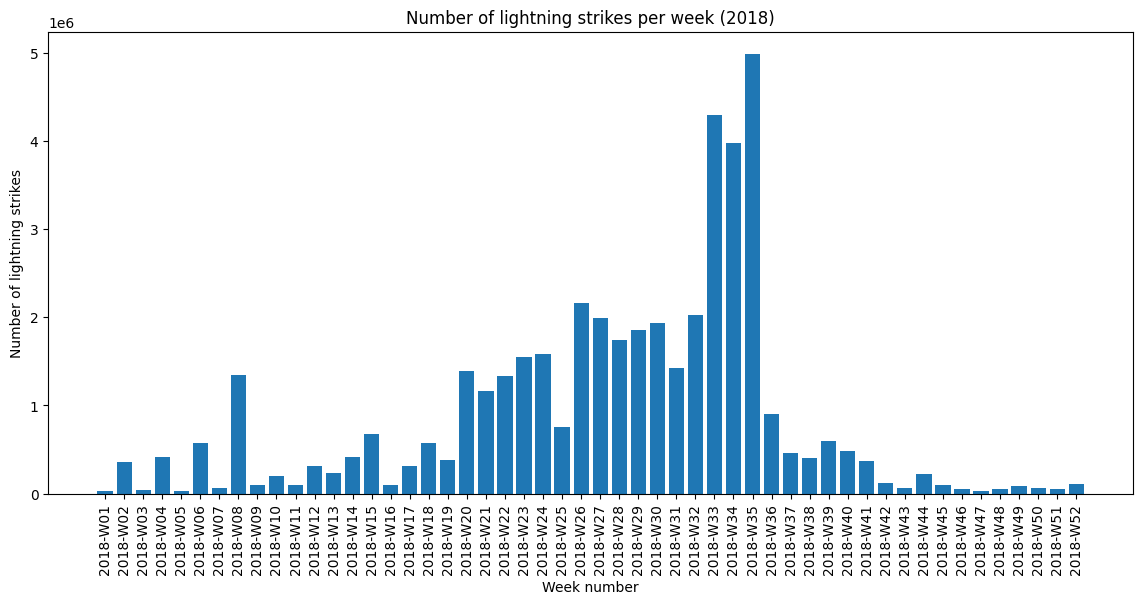

In [116]:
plt.figure(figsize=(14, 6))  # Makes the plot wider for better readability 

plt.bar(
    x = df_by_week_2018['week'],
    height = df_by_week_2018['number_of_strikes']
)

plt.xlabel('Week number')
plt.ylabel('Number of lightning strikes')
plt.title('Number of lightning strikes per week (2018)')

plt.xticks(rotation=90)
plt.show()


## Quarterly Aggregation and Scaling

Lightning strike counts are aggregated by quarter.
To improve readability, the values are scaled to millions of strikes.


In [117]:
df_by_quarter = (
    df.groupby('quarter', as_index=False)['number_of_strikes']
    .sum()
)

df_by_quarter['number_of_strikes'] = (
    df_by_quarter['number_of_strikes'].div(1_000_000)
)

df_by_quarter.head()


,quarter,number_of_strikes
0,2016-Q1,2.683798
1,2016-Q2,15.084857
2,2016-Q3,21.843820
3,2016-Q4,1.969754
4,2017-Q1,2.444279


<function matplotlib.pyplot.show(close=None, block=None)>

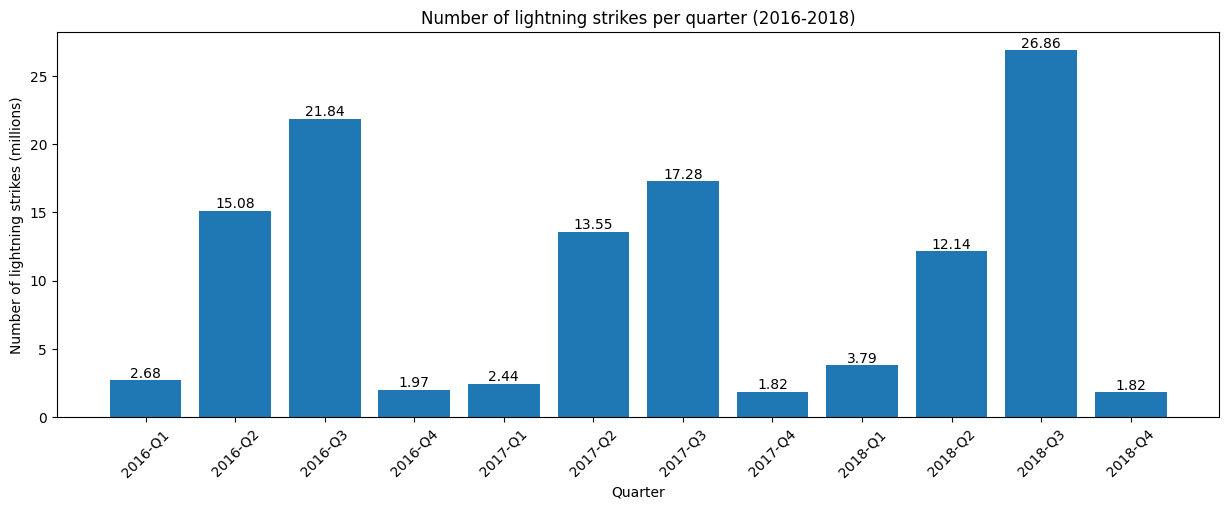

In [118]:
df_by_quarter['labels'] = df_by_quarter['number_of_strikes'].round(2).astype(str)


def addlabels(x, y, labels):
    for i in range(len(x)):
        plt.text(i, y[i],labels[i],ha='center',va='bottom')


plt.figure(figsize=(15,5))
plt.bar(
    x = df_by_quarter['quarter'],
    height= df_by_quarter['number_of_strikes']
)
addlabels(
    df_by_quarter['quarter'], 
    df_by_quarter['number_of_strikes'].values,
    df_by_quarter['labels'].values
    )
plt.xlabel('Quarter')
plt.ylabel('Number of lightning strikes (millions)')
plt.title('Number of lightning strikes per quarter (2016-2018)')
plt.xticks(rotation=45)

plt.show

### Alternative visualization approach (Seaborn)

In addition to the Matplotlib-based bar chart, the same visualization can be created using the Seaborn library.

Seaborn provides a higher-level interface for statistical visualizations and allows grouping data by an additional categorical variable using the `hue` parameter. In this case, the lightning strike counts are grouped by quarter and colored by year, which improves readability and comparison across years.

Both approaches produce the same insights, but Seaborn simplifies grouped visualizations and styling, while Matplotlib offers more granular control over plot elements.


In [119]:
df_by_quarter[['quarter','number_of_strikes']].head()


,quarter,number_of_strikes
0,2016-Q1,2.683798
1,2016-Q2,15.084857
2,2016-Q3,21.843820
3,2016-Q4,1.969754
4,2017-Q1,2.444279


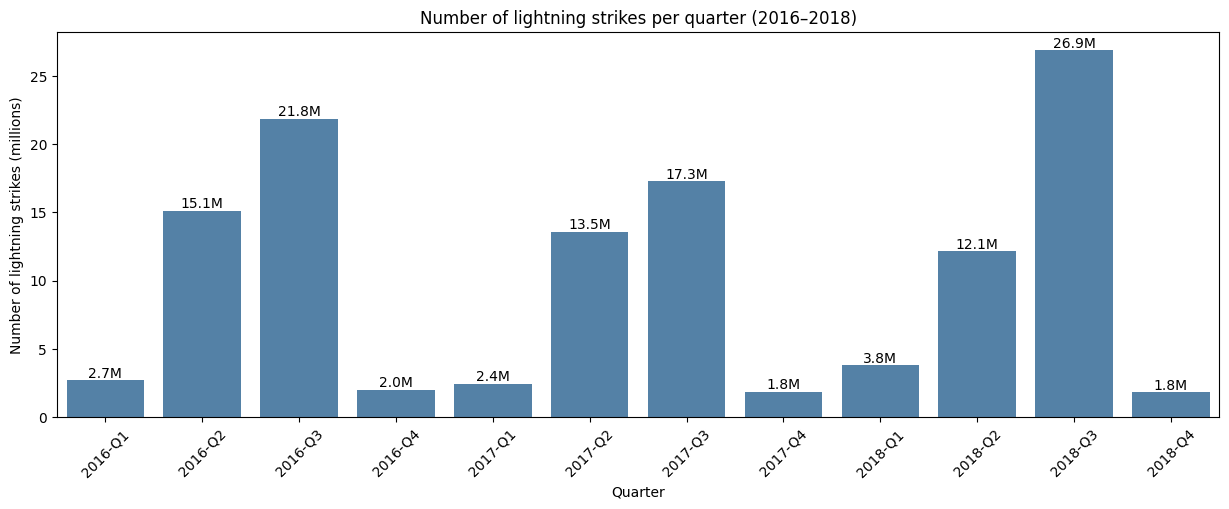

In [120]:
# Make sure data is ordered chronologically
df_plot = df_by_quarter.sort_values('quarter').copy()

plt.figure(figsize=(15, 5))

p = sns.barplot(
    data=df_plot,
    x='quarter',
    y='number_of_strikes',
    color='steelblue'   
)

# Add labels on top of each bar (values already in millions)
for i, v in enumerate(df_plot['number_of_strikes']):
    p.text(
        i,
        v,
        f"{v:.1f}M",
        ha='center',
        va='bottom'
    )

plt.xlabel('Quarter')
plt.ylabel('Number of lightning strikes (millions)')
plt.title('Number of lightning strikes per quarter (2016–2018)')
plt.xticks(rotation=45)
plt.show()


## Lightning Strikes per Quarter (2016–2018)

The bar chart above shows the total number of lightning strikes per quarter between 2016 and 2018.

### Key observations:

- The data shows a **clear seasonal pattern**, with the highest number of lightning strikes consistently occurring during the **third quarter (Q3)** of each year.
- **Q3 2018 records the highest number of lightning strikes** across all quarters and years analyzed.
- When comparing Q3 across years:
  - Lightning activity increases from **2016 to 2017**, and rises even more sharply in **2018**.
  - This indicates a notable year-over-year increase in lightning strikes during the summer season.
- **Q1 and Q4 exhibit significantly lower values**, suggesting reduced lightning activity during colder months.

### Insight:

The results suggest that lightning strikes are strongly influenced by **seasonal climatic conditions**, peaking during summer months. The exceptionally high number of strikes in **Q3 2018** may reflect more intense storm activity or unusual weather patterns during that period.


## Conclusion

This analysis explored lightning strike activity in the United States between 2016 and 2018 using NOAA data, with a focus on quarterly trends.

The results reveal a **strong seasonal pattern** in lightning activity. Across all three years, the **third quarter (Q3)** consistently shows the highest number of lightning strikes, corresponding to the summer season when convective storms are more frequent.

A key finding is that **Q3 of 2018 recorded the highest number of lightning strikes** among all quarters analyzed. This represents a noticeable increase compared to Q3 in both 2016 and 2017, suggesting either more intense storm activity, improved detection, or broader climatic factors affecting that year.

In contrast, **Q1 and Q4 consistently show the lowest lightning counts**, reinforcing the impact of colder weather conditions on lightning occurrence.

Overall, this project demonstrates how temporal aggregation and visualization can uncover meaningful patterns in large-scale environmental datasets. The findings highlight the importance of seasonal analysis when studying weather-related phenomena and provide a solid foundation for further spatial or climatological investigations.
